In [ ]:
#pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_hub as hub
import PIL.Image as Image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [7]:
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


In [8]:
img_path = '/content/sample_data/Falcon9_1.jpg'

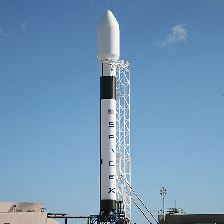

In [13]:
img = image.load_img(img_path, target_size=(224,224))
img

In [14]:
x = np.array(img)
x

array([[[ 67, 108, 152],
        [ 67, 108, 152],
        [ 67, 108, 152],
        ...,
        [ 88, 126, 165],
        [ 82, 121, 164],
        [ 84, 123, 166]],

       [[ 66, 107, 153],
        [ 66, 107, 153],
        [ 66, 107, 153],
        ...,
        [ 81, 123, 163],
        [ 82, 121, 162],
        [ 83, 122, 163]],

       [[ 67, 108, 154],
        [ 67, 108, 154],
        [ 67, 108, 154],
        ...,
        [ 81, 123, 163],
        [ 80, 124, 163],
        [ 80, 124, 163]],

       ...,

       [[184, 167, 157],
        [185, 168, 158],
        [184, 167, 157],
        ...,
        [ 45,  47,  46],
        [ 36,  42,  40],
        [ 42,  48,  46]],

       [[194, 176, 166],
        [192, 174, 164],
        [185, 168, 158],
        ...,
        [ 34,  40,  40],
        [ 33,  39,  37],
        [ 37,  43,  41]],

       [[195, 177, 163],
        [176, 158, 146],
        [184, 167, 157],
        ...,
        [ 19,  29,  28],
        [ 27,  31,  32],
        [ 29,  33,  34]]

In [15]:
x.shape

(224, 224, 3)

In [16]:
x = np.expand_dims(x,axis=0)

In [17]:
x

array([[[[ 67, 108, 152],
         [ 67, 108, 152],
         [ 67, 108, 152],
         ...,
         [ 88, 126, 165],
         [ 82, 121, 164],
         [ 84, 123, 166]],

        [[ 66, 107, 153],
         [ 66, 107, 153],
         [ 66, 107, 153],
         ...,
         [ 81, 123, 163],
         [ 82, 121, 162],
         [ 83, 122, 163]],

        [[ 67, 108, 154],
         [ 67, 108, 154],
         [ 67, 108, 154],
         ...,
         [ 81, 123, 163],
         [ 80, 124, 163],
         [ 80, 124, 163]],

        ...,

        [[184, 167, 157],
         [185, 168, 158],
         [184, 167, 157],
         ...,
         [ 45,  47,  46],
         [ 36,  42,  40],
         [ 42,  48,  46]],

        [[194, 176, 166],
         [192, 174, 164],
         [185, 168, 158],
         ...,
         [ 34,  40,  40],
         [ 33,  39,  37],
         [ 37,  43,  41]],

        [[195, 177, 163],
         [176, 158, 146],
         [184, 167, 157],
         ...,
         [ 19,  29,  28],
        

In [18]:
x.shape

(1, 224, 224, 3)

In [19]:
x =  preprocess_input(x)

In [20]:
x

array([[[[  48.060997 ,   -8.778999 ,  -56.68     ],
         [  48.060997 ,   -8.778999 ,  -56.68     ],
         [  48.060997 ,   -8.778999 ,  -56.68     ],
         ...,
         [  61.060997 ,    9.221001 ,  -35.68     ],
         [  60.060997 ,    4.2210007,  -41.68     ],
         [  62.060997 ,    6.2210007,  -39.68     ]],

        [[  49.060997 ,   -9.778999 ,  -57.68     ],
         [  49.060997 ,   -9.778999 ,  -57.68     ],
         [  49.060997 ,   -9.778999 ,  -57.68     ],
         ...,
         [  59.060997 ,    6.2210007,  -42.68     ],
         [  58.060997 ,    4.2210007,  -41.68     ],
         [  59.060997 ,    5.2210007,  -40.68     ]],

        [[  50.060997 ,   -8.778999 ,  -56.68     ],
         [  50.060997 ,   -8.778999 ,  -56.68     ],
         [  50.060997 ,   -8.778999 ,  -56.68     ],
         ...,
         [  59.060997 ,    6.2210007,  -42.68     ],
         [  59.060997 ,    7.2210007,  -43.68     ],
         [  59.060997 ,    7.2210007,  -43.68     ]],

In [21]:
x.shape

(1, 224, 224, 3)

In [22]:
predictionVal = model.predict(x)
predictionVal

array([[2.09458095e-09, 1.13088594e-09, 4.25154987e-08, 4.19912567e-08,
        7.34203383e-08, 3.05698755e-09, 1.83022530e-09, 9.76446390e-09,
        2.96140290e-09, 1.86060090e-09, 9.17207366e-10, 1.67944181e-09,
        1.70476131e-08, 6.21879048e-10, 6.32185693e-10, 1.96911087e-09,
        1.26061062e-09, 2.64895017e-09, 9.28777411e-09, 3.48589796e-10,
        1.84507520e-10, 9.84104243e-10, 3.95127753e-09, 3.17966951e-08,
        1.80817483e-09, 3.14195669e-10, 3.29993477e-10, 2.80160145e-10,
        1.42772003e-10, 2.00719374e-09, 7.90899346e-10, 4.16197965e-10,
        7.86207835e-11, 2.46705456e-09, 1.46162571e-09, 3.75207587e-10,
        2.72459455e-09, 3.72415543e-10, 2.78683882e-10, 3.79564735e-09,
        3.91777555e-10, 4.19242280e-10, 2.52274146e-10, 1.12028475e-09,
        6.40320019e-10, 1.62733316e-09, 2.21208510e-10, 4.81062579e-10,
        2.61480365e-10, 2.72239564e-10, 1.08942477e-09, 1.35562033e-08,
        2.57448590e-10, 4.40834452e-10, 7.87641674e-10, 5.939005

In [23]:
highestVal = np.argmax(predictionVal)
highestVal

744

In [59]:
#decode what the category of data is :
# use the below url dataset and match the Category  index retrieved in the previous step
#https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json
import urllib.request
import json
image_labels = {}
with urllib.request.urlopen('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json') as response:
   image_labels = json.loads(response.read())
print(image_labels)
# with urllib.request.urlopen("https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json", "r") as f:
#     image_labels = f.read().splitlines()
# image_labels[:5]

{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [64]:
image_labels[str(highestVal)]
#output from the resnet50 for the data provided as input image

['n04008634', 'projectile']

In [24]:
print('Predicted:', decode_predictions(predictionVal, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n04008634', 'projectile', 0.5519192), ('n03773504', 'missile', 0.44573697), ('n04347754', 'submarine', 0.00043406672)]


In [65]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           